In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
x = pd.read_csv("BC_Xtrain.csv").drop(columns=["Unnamed: 0"])
y = pd.read_csv("BC_ytrain.csv").drop(columns=["Unnamed: 0"])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(x)

In [3]:
print("Number of interations: ", kmeans.n_iter_)

Number of interations:  4


In [4]:
labels = pd.Series(data=kmeans.labels_)
result = pd.concat([labels, y], axis=1)
result.columns=["cluster","diagnosis"]
print("total: %d Ms, %d Bs" %(len(result.loc[result.diagnosis==1]),
                              len(result.loc[result.diagnosis==0])))

total: 158 Ms, 268 Bs


In [5]:
combined = pd.concat([x.radius_mean, x.texture_mean, result], axis=1)
combined1 = []
combined1.append(combined.loc[combined.cluster==0].loc[combined.diagnosis==0])
combined1.append(combined.loc[combined.cluster==0].loc[combined.diagnosis==1])
combined1.append(combined.loc[combined.cluster==1].loc[combined.diagnosis==0])
combined1.append(combined.loc[combined.cluster==1].loc[combined.diagnosis==1])

Text(0.5, 1.0, 'Original')

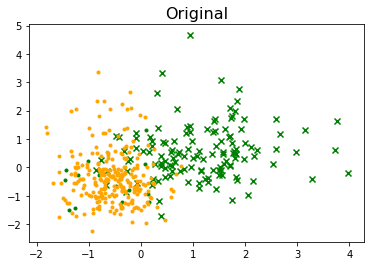

In [6]:
colors = ["green", "green", "orange", "orange"]
markers = [".","x",".","x"]
for i in range(3):
    plt.scatter(combined1[i].radius_mean, combined1[i].texture_mean, color=colors[i], marker=markers[i])
plt.title("Original", fontsize=16)

Text(0.5, 1.0, 'Breast Cancer, total')

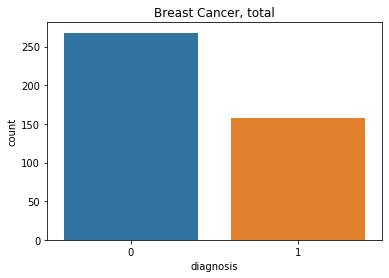

In [7]:
sns.countplot(data=result, x="diagnosis").set_title("Breast Cancer, total")

In [8]:
cluster0 = result.loc[result.cluster==0]
cluster1 = result.loc[result.cluster==1]

In [9]:
print("cluster0: %d Ms, %d Bs" %(len(cluster0.loc[cluster0.diagnosis==1]),
                                 len(cluster0.loc[cluster0.diagnosis==0])))

cluster0: 132 Ms, 14 Bs


Text(0.5, 1.0, 'Breast Cancer, K-means, cluster 0')

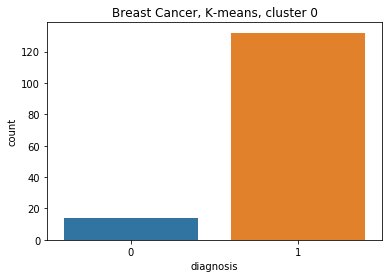

In [10]:
sns.countplot(data=cluster0, x="diagnosis").set_title("Breast Cancer, K-means, cluster 0")

In [11]:
print("cluster1: %d Ms, %d Bs" %(len(cluster1.loc[cluster1.diagnosis==1]),
                                 len(cluster1.loc[cluster1.diagnosis==0])))

cluster1: 26 Ms, 254 Bs


Text(0.5, 1.0, 'Breast Cancer, K-means, cluster 1')

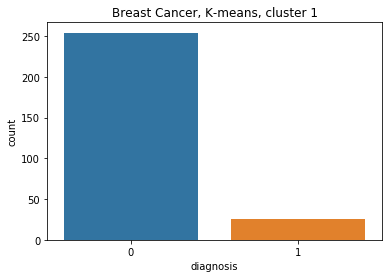

In [12]:
sns.countplot(data=cluster1, x="diagnosis").set_title("Breast Cancer, K-means, cluster 1")

In [13]:
from sklearn.mixture import GaussianMixture
EM = GaussianMixture(n_components=2, n_init=10).fit_predict(x)

In [14]:
EMlabels = pd.Series(data=EM)
EMresult = pd.concat([EMlabels, y], axis=1)
EMresult.columns=["cluster","diagnosis"]
EMcluster0 = EMresult.loc[EMresult.cluster==0]
EMcluster1 = EMresult.loc[EMresult.cluster==1]

In [15]:
print("cluster0: %d Ms, %d Bs" %(len(EMcluster0.loc[EMcluster0.diagnosis==1]),
                                 len(EMcluster0.loc[EMcluster0.diagnosis==0])))

cluster0: 147 Ms, 12 Bs


Text(0.5, 1.0, 'Breast Cancer, EM, cluster 0')

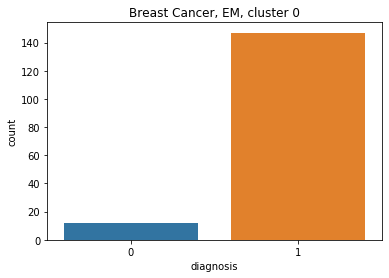

In [16]:
sns.countplot(data=EMcluster0, x="diagnosis").set_title("Breast Cancer, EM, cluster 0")

In [17]:
print("cluster1: %d Ms, %d Bs" %(len(EMcluster1.loc[EMcluster1.diagnosis==1]),
                                 len(EMcluster1.loc[EMcluster1.diagnosis==0])))

cluster1: 11 Ms, 256 Bs


Text(0.5, 1.0, 'Breast Cancer, EM, cluster 1')

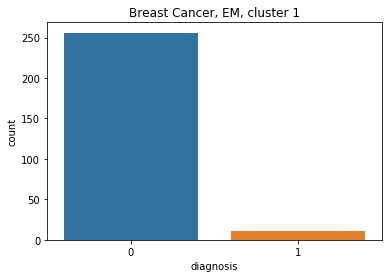

In [18]:
sns.countplot(data=EMcluster1, x="diagnosis").set_title("Breast Cancer, EM, cluster 1")

Text(0.5, -0.05, 'Figure1. Breast Cancer Dataset, No Dimensionality Reduction')

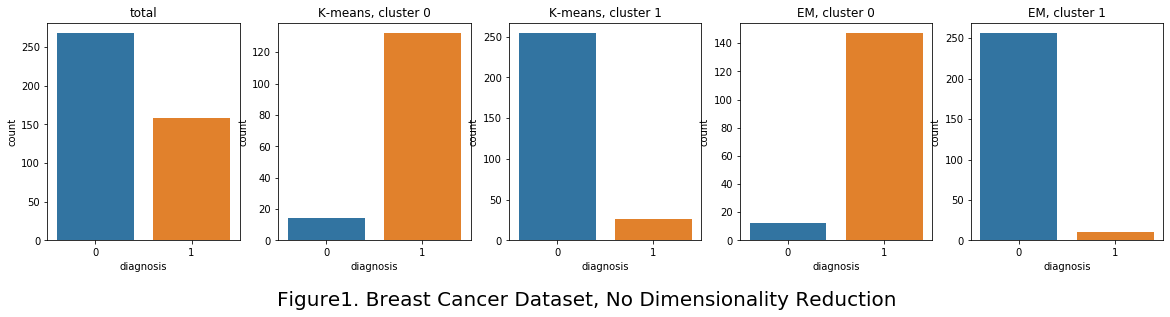

In [19]:
fig, axs = plt.subplots(1,5,figsize=(20,4))
sns.countplot(data=result, x="diagnosis", ax=axs[0]).set_title("total")
sns.countplot(data=cluster0, x="diagnosis", ax=axs[1]).set_title("K-means, cluster 0")
sns.countplot(data=cluster1, x="diagnosis", ax=axs[2]).set_title("K-means, cluster 1")
sns.countplot(data=EMcluster0, x="diagnosis", ax=axs[3]).set_title("EM, cluster 0")
sns.countplot(data=EMcluster1, x="diagnosis", ax=axs[4]).set_title("EM, cluster 1")
fig.suptitle("Figure1. Breast Cancer Dataset, No Dimensionality Reduction", fontsize=20,y=-0.05)

In [20]:
from sklearn.metrics import homogeneity_score
error = []
purity = []
for k in range(2, 31):
    kmeans1 = KMeans(n_clusters=k).fit(x)
    error.append(kmeans1.inertia_)
    purity.append(homogeneity_score(y.values.flatten(), kmeans1.labels_))

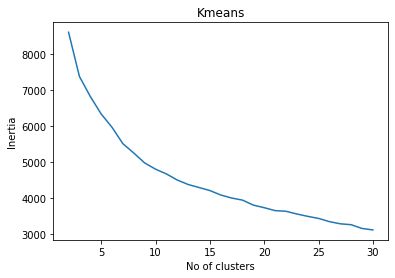

In [21]:
plt.plot(range(2,31), error)
plt.title('Kmeans')
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()

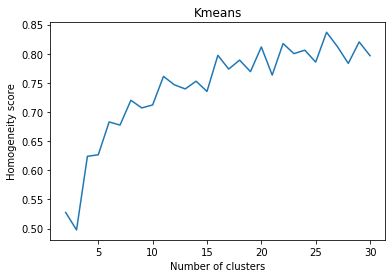

In [22]:
plt.plot(range(2,31),purity)
plt.title('Kmeans')
plt.xlabel('Number of clusters')
plt.ylabel('Homogeneity score')
plt.show()

In [23]:
error = []
purity = []
for k in range(2, 31):
    EM1 = GaussianMixture(n_components=k, n_init=10).fit_predict(x)
    purity.append(homogeneity_score(y.values.flatten(), EM1))

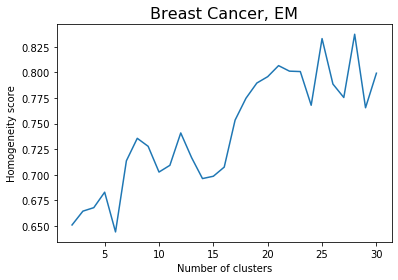

In [24]:
plt.plot(range(2,31),purity)
plt.title('Breast Cancer, EM', fontsize=16)
plt.xlabel('Number of clusters')
plt.ylabel('Homogeneity score')
plt.show()

In [25]:
###########ANN
x_train = pd.read_csv("BC_Xtrain.csv").drop(columns=["Unnamed: 0"])
y_train = pd.read_csv("BC_ytrain.csv").drop(columns=["Unnamed: 0"])
x_test = pd.read_csv("BC_Xtest.csv").drop(columns=["Unnamed: 0"])
y_test = pd.read_csv("BC_ytest.csv").drop(columns=["Unnamed: 0"])
y_train = y_train.to_numpy().flatten()
y_test = y_test.to_numpy().flatten()

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time
#train on original dataset
clf = MLPClassifier(max_iter=10000, activation='logistic', hidden_layer_sizes=10)
t = time.time()
clf.fit(x_train, y_train)
t = (time.time()- t) * 1000
train_acc = accuracy_score(y_train, clf.predict(x_train))
test_acc = accuracy_score(y_test,clf.predict(x_test))
print("Original: time %dms, train accuracy %.4f, test accuracy %.4f"%(t, train_acc, test_acc))

Original: time 454ms, train accuracy 0.9836, test accuracy 0.9790


In [27]:
kmeans2 = KMeans(n_clusters=10).fit(x_train)
x_train1 = kmeans2.transform(x_train)
x_test1 = kmeans2.transform(x_test)

In [28]:
#train on Kmeans transformed dataset
t = time.time()
clf.fit(x_train1, y_train)
t = (time.time()- t) * 1000
train_acc = accuracy_score(y_train, clf.predict(x_train1))
test_acc = accuracy_score(y_test,clf.predict(x_test1))
print("Kmeans: time %dms, train accuracy %.4f, test accuracy %.4f"%(t, train_acc, test_acc))

Kmeans: time 678ms, train accuracy 0.9718, test accuracy 0.9510


In [30]:
EM2 = GaussianMixture(n_components=10, n_init=10).fit(x_train)
x_train2 = kmeans2.transform(x_train)
x_test2 = kmeans2.transform(x_test)

In [31]:
#train on EM transformed dataset
t = time.time()
clf.fit(x_train1, y_train)
t = (time.time()- t) * 1000
train_acc = accuracy_score(y_train, clf.predict(x_train2))
test_acc = accuracy_score(y_test,clf.predict(x_test2))
print("EM: time %dms, train accuracy %.4f, test accuracy %.4f"%(t, train_acc, test_acc))

EM: time 578ms, train accuracy 0.9695, test accuracy 0.9650
